<a href="https://colab.research.google.com/github/SoujanyaMirajkar/Alzheimer-s-Disease/blob/main/Outliers_Removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load your dataset
data = pd.read_csv('/content/Alzheimer_Disease_notnull1.csv')
data

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Class,Topic,Question,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Type,Data_Value,Age,Gender,Ethnicity,Geolocation
0,1,2021,2021,WEST,West,4,Arthritis among older adults,Percentage of older adults ever told they have...,28.800000,34.400000,1,31.600000,0.0,0.0,2.0,NaN
1,2,2017,2017,NRE,Northeast,4,Arthritis among older adults,Percentage of older adults ever told they have...,49.100000,51.600000,1,50.300000,1.0,0.0,5.0,NaN
2,3,2019,2019,MDW,Midwest,3,Eating 3 or more vegetables daily,Percentage of older adults who are eating 3 or...,13.800000,14.800000,1,14.300000,0.0,0.0,5.0,NaN
3,4,2020,2020,US,"United States, DC & Territories",4,Arthritis among older adults,Percentage of older adults ever told they have...,54.500000,56.400000,1,55.500000,1.0,0.0,5.0,NaN
4,5,2020,2020,NH,New Hampshire,2,Frequent mental distress,Percentage of older adults who are experiencin...,12.800000,18.000000,1,15.200000,0.0,0.0,5.0,POINT (-71.50036091999965 43.65595011300047)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134152,134153,2018,2018,DE,Delaware,6,Binge drinking within past 30 days,Percentage of older adults who reported binge ...,4.900000,9.300000,1,6.800000,1.0,1.0,5.0,POINT (-75.57774116799965 39.008830667000495)
134153,134154,2018,2018,GA,Georgia,0,Duration of caregiving among older adults,Percentage of older adults who provided care t...,35.072252,45.241172,1,39.998906,0.0,0.0,4.0,POINT (-83.62758034599966 32.83968109300048)
134154,134155,2019,2019,ME,Maine,2,Frequent mental distress,Percentage of older adults who are experiencin...,5.600000,9.000000,1,7.100000,1.0,1.0,5.0,POINT (-68.98503133599962 45.254228894000505)
134155,134156,2020,2020,OR,Oregon,4,Self-rated health (fair to poor health),Percentage of older adults who self-reported t...,13.800000,18.600000,1,16.000000,0.0,0.0,5.0,POINT (-120.15503132599969 44.56744942400047)


In [ ]:
# Load your dataset
data = pd.read_csv('/content/Alzheimer_Disease_notnull1.csv')

#column=['','','Data_Value']

# Define a function to remove outliers using capping method
def remove_outliers_capping(df, Low_Confidence_Limit, lower_threshold=None, upper_threshold=None):
    if lower_threshold is None:
        lower_threshold = df[Low_Confidence_Limit].quantile(0.05)  # Set lower threshold to 5th percentile
    if upper_threshold is None:
        upper_threshold = df[Low_Confidence_Limit].quantile(0.95)  # Set upper threshold to 95th percentile

    # Cap values below the lower threshold
    df[Low_Confidence_Limit] = df[Low_Confidence_Limit].apply(lambda x: lower_threshold if x < lower_threshold else x)

    # Cap values above the upper threshold
    df[Low_Confidence_Limit] = df[Low_Confidence_Limit].apply(lambda x: upper_threshold if x > upper_threshold else x)

# Specify the column name for which you want to remove outliers
column_name = 'Low_Confidence_Limit'

# Call the function to remove outliers using capping method
remove_outliers_capping(data, column_name)


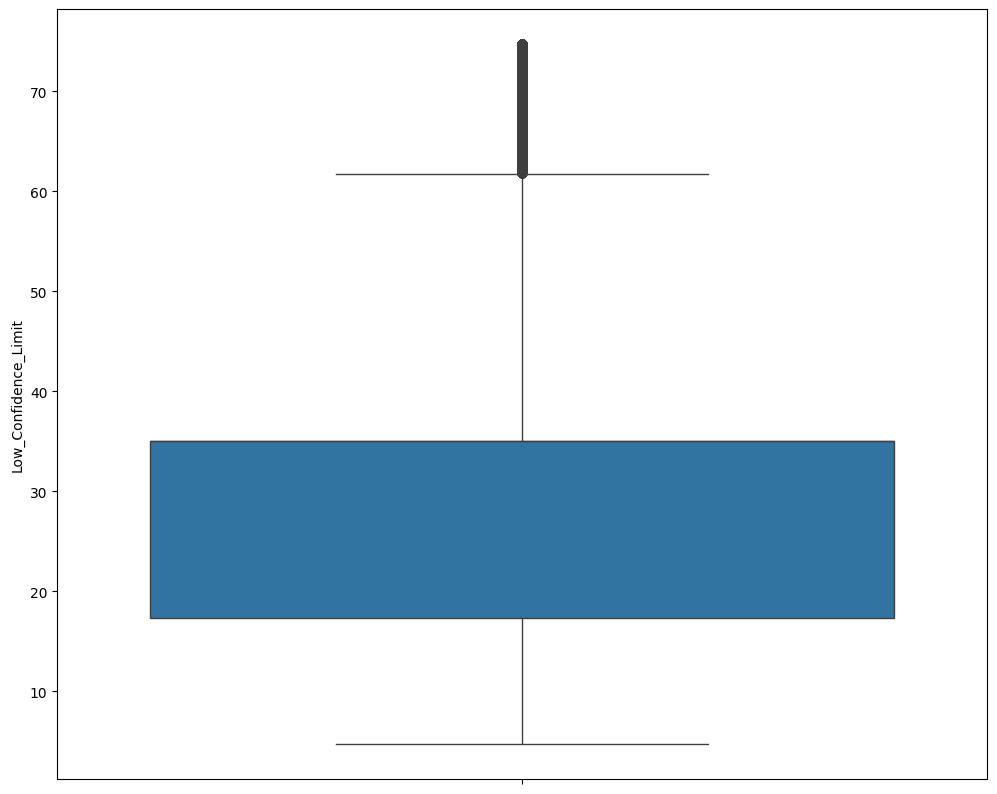

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
plt.figure(figsize=(12,10))
sns.boxplot(data['Low_Confidence_Limit'])
plt.show()

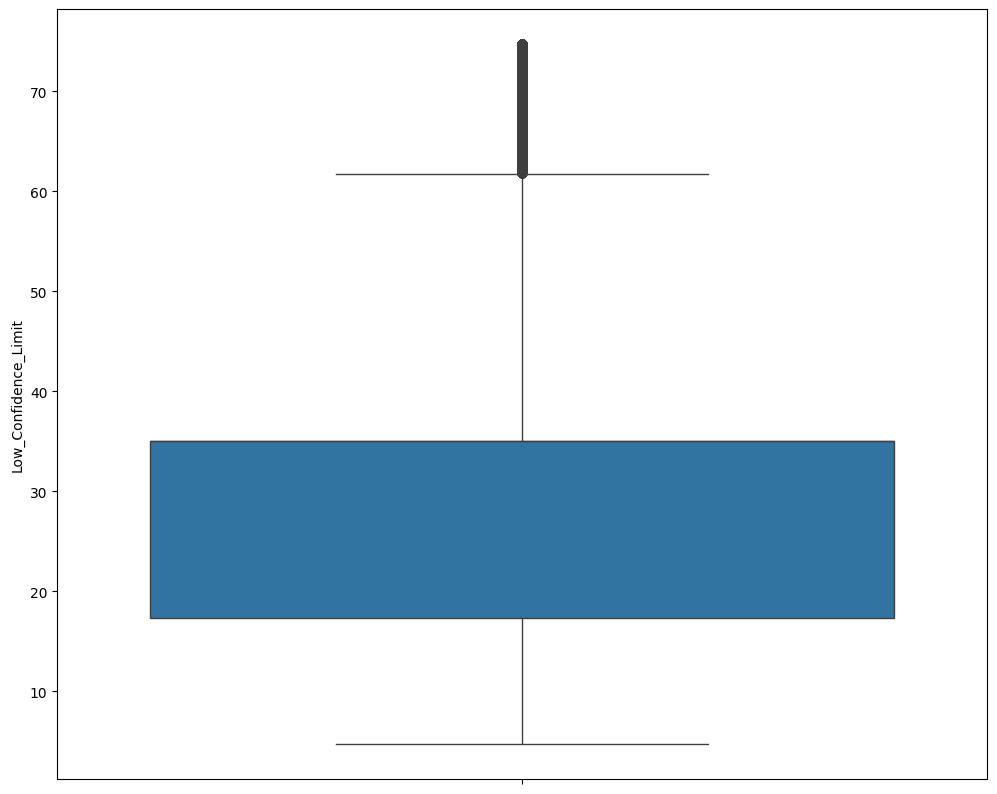

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Remove outliers from the Low_Confidence_Limit column
data['Low_Confidence_Limit'] = data['Low_Confidence_Limit'][~((data['Low_Confidence_Limit'] - data['Low_Confidence_Limit'].mean()).abs() > (3 * data['Low_Confidence_Limit'].std()))]

# Recreate the boxplot
plt.figure(figsize=(12,10))
sns.boxplot(data['Low_Confidence_Limit'])
plt.show()

In [ ]:
data['Low_Confidence_Limit'].median()

35.07225240713062

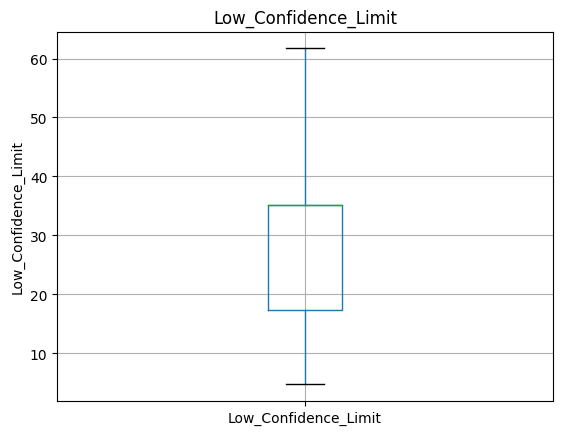

In [ ]:
iqr_multiplier = 1.5
q1 = data['Low_Confidence_Limit'].quantile(0.25)
q3 = data['Low_Confidence_Limit'].quantile(0.75)
iqr = q3 - q1

  # Define lower and upper outlier bounds
lower_bound = q1 - iqr_multiplier * iqr
upper_bound = q3 + iqr_multiplier * iqr

  # Impute outliers with min and max values
data.loc[data['Low_Confidence_Limit'] < lower_bound,'Low_Confidence_Limit'] = lower_bound
data.loc[data['Low_Confidence_Limit'] > upper_bound,'Low_Confidence_Limit'] = upper_bound


data.boxplot(column='Low_Confidence_Limit')

plt.ylabel('Low_Confidence_Limit')

plt.title('Low_Confidence_Limit')

plt.show()

## To remove the outliers of High_confidence_limit

In [ ]:
# Load your dataset
data = pd.read_csv('/content/Alzheimer_Disease_notnull1.csv')

# Define a function to remove outliers using capping method
def remove_outliers_capping(df, High_Confidence_Limit, lower_threshold=None, upper_threshold=None):
    if lower_threshold is None:
        lower_threshold = df[High_Confidence_Limit].quantile(0.05)  # Set lower threshold to 5th percentile
    if upper_threshold is None:
        upper_threshold = df[High_Confidence_Limit].quantile(0.95)  # Set upper threshold to 95th percentile

    # Cap values below the lower threshold
    df[High_Confidence_Limit] = df[High_Confidence_Limit].apply(lambda x: lower_threshold if x < lower_threshold else x)

    # Cap values above the upper threshold
    df[High_Confidence_Limit] = df[High_Confidence_Limit].apply(lambda x: upper_threshold if x > upper_threshold else x)

# Specify the column name for which you want to remove outliers
column_name = 'High_Confidence_Limit'

# Call the function to remove outliers using capping method
remove_outliers_capping(data, column_name)

# Optionally, you can save the modified dataset
# data.to_csv('data_without_outliers.csv', index=False)


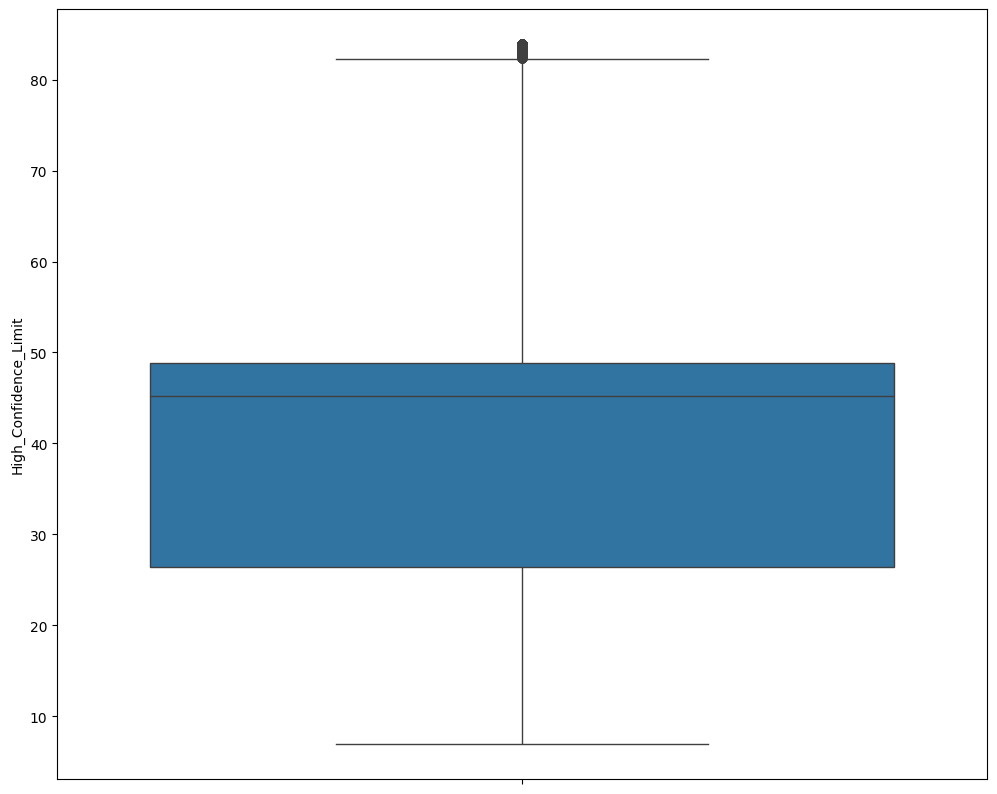

In [ ]:
plt.figure(figsize=(12,10))
sns.boxplot(data['High_Confidence_Limit'])
plt.show()

In [ ]:
# Load your dataset
data = pd.read_csv('/content/Alzheimer_Disease_notnull1.csv')

# Define a function to remove outliers using capping method
def remove_outliers_capping(df, Data_Value, lower_threshold=None, upper_threshold=None):
    if lower_threshold is None:
        lower_threshold = df[Data_Value].quantile(0.05)  # Set lower threshold to 5th percentile
    if upper_threshold is None:
        upper_threshold = df[Data_Value].quantile(0.95)  # Set upper threshold to 95th percentile

    # Cap values below the lower threshold
    df[Data_Value] = df[Data_Value].apply(lambda x: lower_threshold if x < lower_threshold else x)

    # Cap values above the upper threshold
    df[Data_Value] = df[Data_Value].apply(lambda x: upper_threshold if x > upper_threshold else x)

# Specify the column name for which you want to remove outliers
column_name = 'Data_Value'

# Call the function to remove outliers using capping method
remove_outliers_capping(data, column_name)

# Optionally, you can save the modified dataset
# data.to_csv('data_without_outliers.csv', index=False)



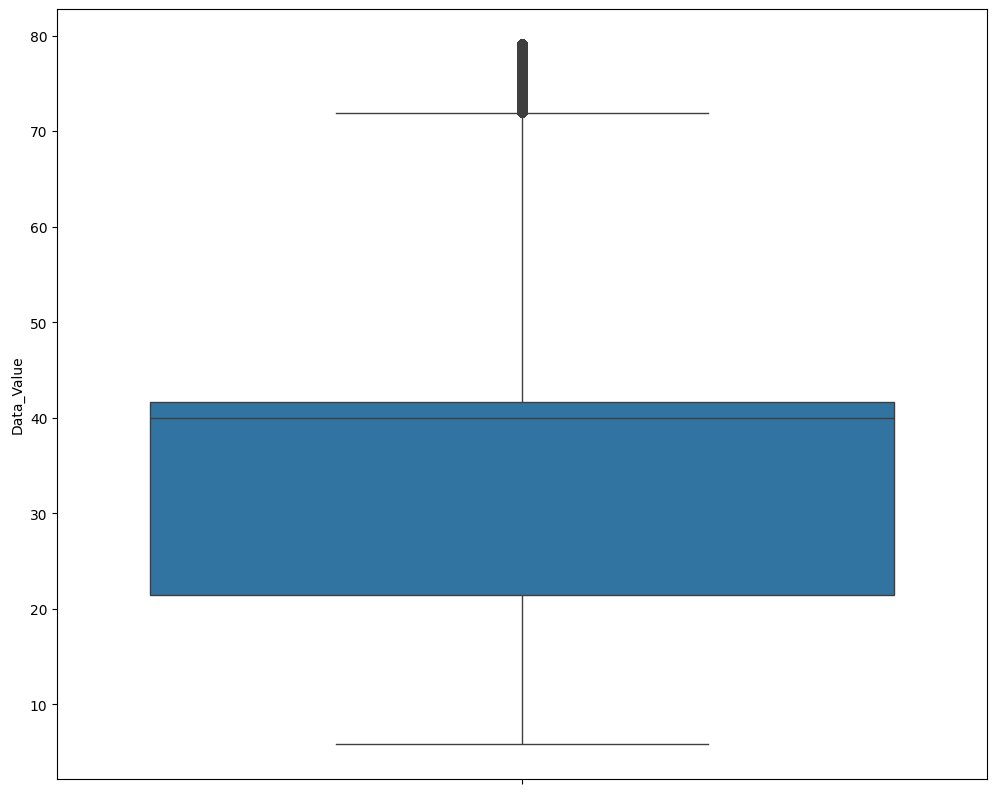

In [ ]:
plt.figure(figsize=(12,10))
sns.boxplot(data['Data_Value'])
plt.show()

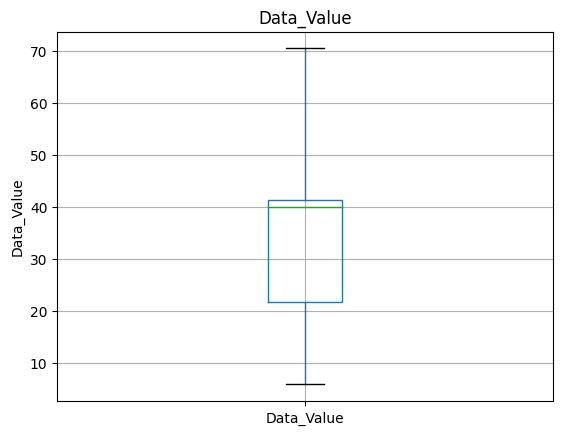

In [ ]:
iqr_multiplier = 1.5
q1 = data['Data_Value'].quantile(0.25)
q3 = data['Data_Value'].quantile(0.75)
iqr = q3 - q1

  # Define lower and upper outlier bounds
lower_bound = q1 - iqr_multiplier * iqr
upper_bound = q3 + iqr_multiplier * iqr

  # Impute outliers with min and max values
data.loc[data['Data_Value'] < lower_bound,'Data_Value'] = lower_bound
data.loc[data['Data_Value'] > upper_bound,'Data_Value'] = upper_bound


data.boxplot(column='Data_Value')

plt.ylabel('Data_Value')

plt.title('Data_Value')

plt.show()

In [ ]:
data['Data_Value'].median()

39.99890559823666